In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart_2022_no_nans.csv')
df

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,Virgin Islands,Male,Very good,0.0,0.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,1.78,102.06,32.28,Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,No
246018,Virgin Islands,Female,Fair,0.0,7.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.93,90.72,24.34,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
246019,Virgin Islands,Male,Good,0.0,15.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,...,1.68,83.91,29.86,Yes,Yes,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Yes
246020,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No


In [ ]:
import pandas as pd


df["Heart Attack"].value_counts()

min_count = df["Heart Attack"].value_counts().min()

df_balanced = df.groupby("Heart Attack").sample(n=min_count, random_state=42)

print(df_balanced["Heart Attack"].value_counts())

df_balanced.to_csv("balanced_data.csv", index=False)


In [3]:
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000
mean,4.119026,4.167140,7.021331,1.705150,83.615179,28.668136
std,8.405844,8.102687,1.440681,0.106654,21.323156,6.513973
min,0.000000,0.000000,1.000000,0.910000,28.120000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.270000
50%,0.000000,0.000000,7.000000,1.700000,81.650000,27.460000
75%,3.000000,4.000000,8.000000,1.780000,95.250000,31.890000
max,30.000000,30.000000,24.000000,2.410000,292.570000,97.650000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

In [5]:
df.duplicated().sum()

np.int64(9)

In [6]:
df.drop_duplicates(inplace=True)


In [7]:
columns_to_drop = [
    'State', 'Sex', 'RaceEthnicityCategory', 'BlindOrVisionDifficulty', 
    'DeafOrHardOfHearing', 'DifficultyConcentrating', 'DifficultyDressingBathing', 
    'DifficultyErrands', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 
    'HighRiskLastYear', 'CovidPos',    "HadAngina", "RemovedTeeth", "HadDepressiveDisorder", 
    "HadArthritis", "ECigaretteUsage", "HeightInMeters", 
    "WeightInKilograms", "HIVTesting", "ChestScan", "MentalHealthDays", "PhysicalHealthDays", "ChestScan"
]

df.drop(columns=columns_to_drop, axis=1, inplace=True)

df


,GeneralHealth,LastCheckupTime,PhysicalActivities,SleepHours,HadHeartAttack,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadKidneyDisease,HadDiabetes,DifficultyWalking,SmokerStatus,AgeCategory,BMI,AlcoholDrinkers
0,Very good,Within past year (anytime less than 12 months ...,Yes,9.0,No,No,No,No,No,No,No,No,Former smoker,Age 65 to 69,27.99,No
1,Very good,Within past year (anytime less than 12 months ...,Yes,6.0,No,No,No,No,No,No,Yes,No,Former smoker,Age 70 to 74,30.13,No
2,Very good,Within past year (anytime less than 12 months ...,No,8.0,No,No,No,No,No,No,No,Yes,Former smoker,Age 75 to 79,31.66,Yes
3,Fair,Within past year (anytime less than 12 months ...,Yes,9.0,No,No,No,Yes,No,No,No,Yes,Never smoked,Age 80 or older,31.32,No
4,Good,Within past year (anytime less than 12 months ...,Yes,5.0,No,No,No,No,No,No,No,No,Never smoked,Age 80 or older,33.07,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,Very good,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,No,No,No,No,No,No,No,No,Never smoked,Age 60 to 64,32.28,Yes
246018,Fair,Within past year (anytime less than 12 months ...,Yes,7.0,No,No,No,No,No,No,No,No,Never smoked,Age 25 to 29,24.34,No
246019,Good,Within past year (anytime less than 12 months ...,Yes,7.0,No,Yes,No,No,No,No,Yes,No,Never smoked,Age 65 to 69,29.86,Yes
246020,Excellent,Within past year (anytime less than 12 months ...,Yes,7.0,No,No,No,No,No,No,No,No,Never smoked,Age 50 to 54,28.66,No


In [8]:
df = df.rename(columns={
    "GeneralHealth": "General Health",
    "LastCheckupTime": "Last Checkup Time",
    "PhysicalActivities": "Physical Activities",
    "SleepHours": "Sleep Hours",
    "HadHeartAttack": "Heart Attack",
    "HadStroke": "Stroke",
    "HadAsthma": "Asthma",
    "HadSkinCancer": "Skin Cancer",
    "HadCOPD": "COPD",
    "HadKidneyDisease": "Kidney Disease",
    "HadDiabetes": "Diabetes",
    "DifficultyWalking": "Difficulty Walking",
    "SmokerStatus": "Smoker Status",
    "AgeCategory": "Age Category",
    "BMI": "Body Mass Index",
    "AlcoholDrinkers": "Alcohol Drinkers"
})


In [9]:
df

,General Health,Last Checkup Time,Physical Activities,Sleep Hours,Heart Attack,Stroke,Asthma,Skin Cancer,COPD,Kidney Disease,Diabetes,Difficulty Walking,Smoker Status,Age Category,Body Mass Index,Alcohol Drinkers
0,Very good,Within past year (anytime less than 12 months ...,Yes,9.0,No,No,No,No,No,No,No,No,Former smoker,Age 65 to 69,27.99,No
1,Very good,Within past year (anytime less than 12 months ...,Yes,6.0,No,No,No,No,No,No,Yes,No,Former smoker,Age 70 to 74,30.13,No
2,Very good,Within past year (anytime less than 12 months ...,No,8.0,No,No,No,No,No,No,No,Yes,Former smoker,Age 75 to 79,31.66,Yes
3,Fair,Within past year (anytime less than 12 months ...,Yes,9.0,No,No,No,Yes,No,No,No,Yes,Never smoked,Age 80 or older,31.32,No
4,Good,Within past year (anytime less than 12 months ...,Yes,5.0,No,No,No,No,No,No,No,No,Never smoked,Age 80 or older,33.07,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,Very good,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,No,No,No,No,No,No,No,No,Never smoked,Age 60 to 64,32.28,Yes
246018,Fair,Within past year (anytime less than 12 months ...,Yes,7.0,No,No,No,No,No,No,No,No,Never smoked,Age 25 to 29,24.34,No
246019,Good,Within past year (anytime less than 12 months ...,Yes,7.0,No,Yes,No,No,No,No,Yes,No,Never smoked,Age 65 to 69,29.86,Yes
246020,Excellent,Within past year (anytime less than 12 months ...,Yes,7.0,No,No,No,No,No,No,No,No,Never smoked,Age 50 to 54,28.66,No


In [10]:

from sklearn.preprocessing import LabelEncoder


In [11]:
categorical_columns = [
    "General Health", "Last Checkup Time", "Physical Activities",
    "Heart Attack", "Stroke", "Asthma", "Skin Cancer",
    "COPD", "Kidney Disease", "Diabetes", "Difficulty Walking",
    "Smoker Status", "Age Category", "Alcohol Drinkers"
]

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  
    label_encoders[col] = le 

In [12]:
df

,General Health,Last Checkup Time,Physical Activities,Sleep Hours,Heart Attack,Stroke,Asthma,Skin Cancer,COPD,Kidney Disease,Diabetes,Difficulty Walking,Smoker Status,Age Category,Body Mass Index,Alcohol Drinkers
0,4,3,1,9.0,0,0,0,0,0,0,0,0,2,9,27.99,0
1,4,3,1,6.0,0,0,0,0,0,0,2,0,2,10,30.13,0
2,4,3,0,8.0,0,0,0,0,0,0,0,1,2,11,31.66,1
3,1,3,1,9.0,0,0,0,1,0,0,0,1,3,12,31.32,0
4,2,3,1,5.0,0,0,0,0,0,0,0,0,3,12,33.07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,4,1,1,6.0,0,0,0,0,0,0,0,0,3,8,32.28,1
246018,1,3,1,7.0,0,0,0,0,0,0,0,0,3,1,24.34,0
246019,2,3,1,7.0,0,1,0,0,0,0,2,0,3,9,29.86,1
246020,0,3,1,7.0,0,0,0,0,0,0,0,0,3,6,28.66,0


In [92]:
df

,General Health,Last Checkup Time,Physical Activities,Sleep Hours,Heart Attack,Stroke,Asthma,Skin Cancer,COPD,Kidney Disease,Diabetes,Difficulty Walking,Smoker Status,Age Category,Body Mass Index,Alcohol Drinkers
0,4,3,1,9.0,0,0,0,0,0,0,0,0,2,9,27.99,0
1,4,3,1,6.0,0,0,0,0,0,0,2,0,2,10,30.13,0
2,4,3,0,8.0,0,0,0,0,0,0,0,1,2,11,31.66,1
3,1,3,1,9.0,0,0,0,1,0,0,0,1,3,12,31.32,0
4,2,3,1,5.0,0,0,0,0,0,0,0,0,3,12,33.07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,4,1,1,6.0,0,0,0,0,0,0,0,0,3,8,32.28,1
246018,1,3,1,7.0,0,0,0,0,0,0,0,0,3,1,24.34,0
246019,2,3,1,7.0,0,1,0,0,0,0,2,0,3,9,29.86,1
246020,0,3,1,7.0,0,0,0,0,0,0,0,0,3,6,28.66,0


In [95]:
df['Heart Attack'].value_counts()

Heart Attack
0    232578
1     13435
Name: count, dtype: int64

In [13]:
x=df.drop(columns=['Heart Attack'])
y=df['Heart Attack']

In [14]:
x

,General Health,Last Checkup Time,Physical Activities,Sleep Hours,Stroke,Asthma,Skin Cancer,COPD,Kidney Disease,Diabetes,Difficulty Walking,Smoker Status,Age Category,Body Mass Index,Alcohol Drinkers
0,4,3,1,9.0,0,0,0,0,0,0,0,2,9,27.99,0
1,4,3,1,6.0,0,0,0,0,0,2,0,2,10,30.13,0
2,4,3,0,8.0,0,0,0,0,0,0,1,2,11,31.66,1
3,1,3,1,9.0,0,0,1,0,0,0,1,3,12,31.32,0
4,2,3,1,5.0,0,0,0,0,0,0,0,3,12,33.07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,4,1,1,6.0,0,0,0,0,0,0,0,3,8,32.28,1
246018,1,3,1,7.0,0,0,0,0,0,0,0,3,1,24.34,0
246019,2,3,1,7.0,1,0,0,0,0,2,0,3,9,29.86,1
246020,0,3,1,7.0,0,0,0,0,0,0,0,3,6,28.66,0


In [15]:
y

0         0
1         0
2         0
3         0
4         0
         ..
246017    0
246018    0
246019    0
246020    0
246021    1
Name: Heart Attack, Length: 246013, dtype: int64

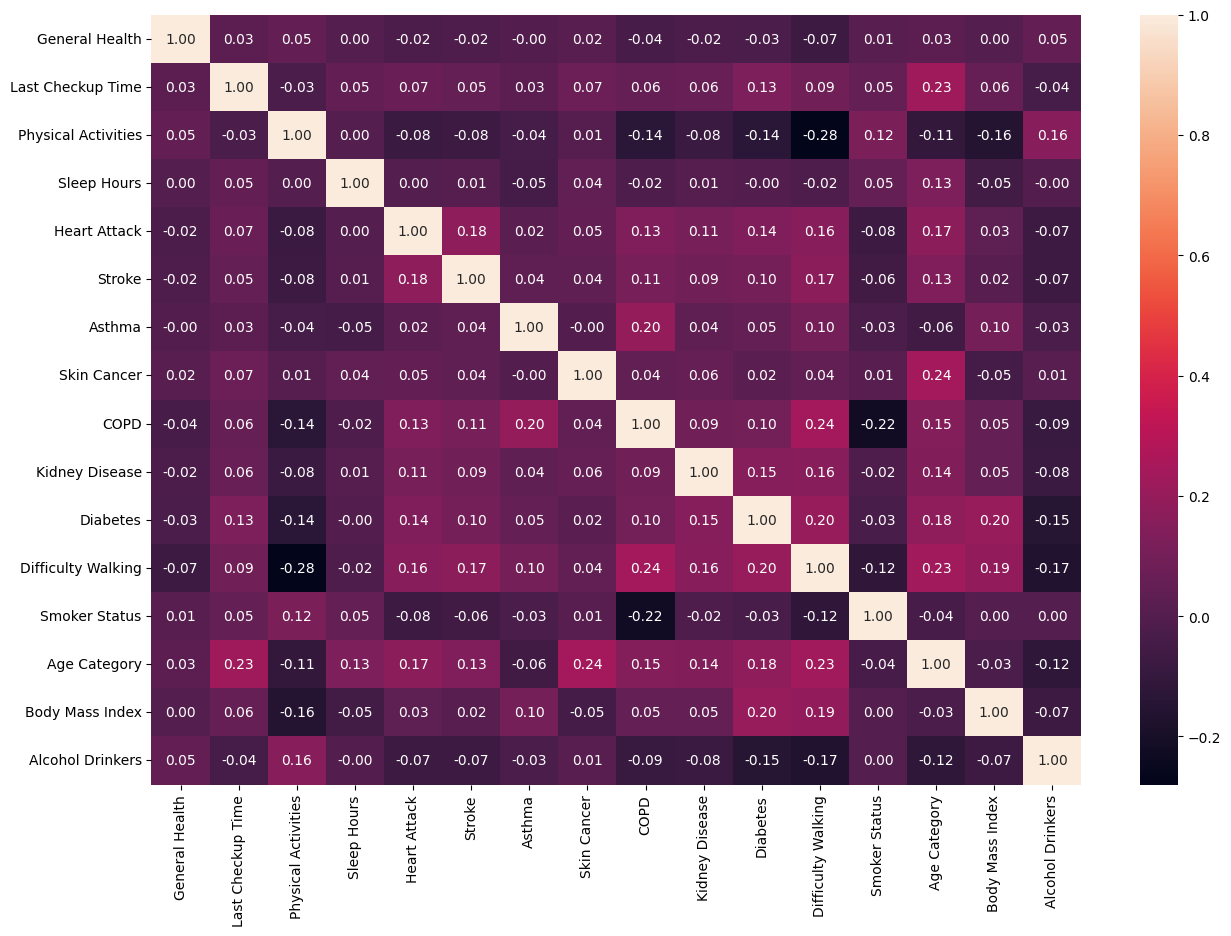

In [40]:
plt.figure(figsize= (15,10))
sns.heatmap(df.corr(), annot = True ,fmt='0.2f')
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix


In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)


In [32]:
model=LogisticRegression(max_iter=500)


In [33]:
model.fit(x,y)


LogisticRegression(max_iter=500)

In [34]:
model.score(x_test,y_test)


0.9446984939942686

In [22]:
model.score(x_train,y_train)


0.9450332808292261

In [65]:
df['Heart Attack'].value_counts()

Heart Attack
0    232578
1     13435
Name: count, dtype: int64

In [25]:
import joblib


In [36]:
joblib.dump(model,'model.pkl')


['model.pkl']

In [37]:
model = joblib.load("model.pkl")


In [28]:
df.columns

Index(['General Health', 'Last Checkup Time', 'Physical Activities',
       'Sleep Hours', 'Heart Attack', 'Stroke', 'Asthma', 'Skin Cancer',
       'COPD', 'Kidney Disease', 'Diabetes', 'Difficulty Walking',
       'Smoker Status', 'Age Category', 'Body Mass Index', 'Alcohol Drinkers'],
      dtype='object')

In [29]:
df.shape

(246013, 16)

In [41]:
from xgboost import XGBClassifier


In [100]:
xgb = XGBClassifier(n_estimators= 600 , max_depth= 10 , learning_rate = 0.1)


In [101]:
xgb.fit(x_train , y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=600,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [102]:
xgb.score(x_train , y_train)


0.9614856968649967

In [103]:
xgb.score(x_test , y_test)


0.9433977602991688

In [105]:
joblib.dump(xgb,'model1.pkl')


['model1.pkl']

In [106]:
xgb = joblib.load("model1.pkl")


In [99]:
df['Heart Attack'].value_counts()

Heart Attack
0    232578
1    116289
Name: count, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd

X = df.drop(columns=['Heart Attack'])  
y = df['Heart Attack']  

smote = SMOTE(sampling_strategy=0.5, random_state=42) 
X_resampled, y_resampled = smote.fit_resample(X, y)

df_resampled = pd.DataFrame(X_resampled, columns=X.columns) 
df_resampled['Heart Attack'] = y_resampled 

print("SMOTE:", Counter(df_resampled['Heart Attack']))

df = df_resampled.copy()

print(df.head())  

توزيع المرض بعد SMOTE: Counter({0: 232578, 1: 116289})
   General Health  Last Checkup Time  Physical Activities  Sleep Hours  \
0               4                  3                    1          9.0   
1               4                  3                    1          6.0   
2               4                  3                    0          8.0   
3               1                  3                    1          9.0   
4               2                  3                    1          5.0   

   Stroke  Asthma  Skin Cancer  COPD  Kidney Disease  Diabetes  \
0       0       0            0     0               0         0   
1       0       0            0     0               0         2   
2       0       0            0     0               0         0   
3       0       0            1     0               0         0   
4       0       0            0     0               0         0   

   Difficulty Walking  Smoker Status  Age Category  Body Mass Index  \
0                   0           

In [ ]:
print(df['Heart Attack'].value_counts())  
print(df.isnull().sum())  

Heart Attack
0    232578
1    116289
Name: count, dtype: int64
General Health         0
Last Checkup Time      0
Physical Activities    0
Sleep Hours            0
Stroke                 0
Asthma                 0
Skin Cancer            0
COPD                   0
Kidney Disease         0
Diabetes               0
Difficulty Walking     0
Smoker Status          0
Age Category           0
Body Mass Index        0
Alcohol Drinkers       0
Heart Attack           0
dtype: int64
